In [5]:
import numpy as np
import dataIO
from sklearn import svm, preprocessing, cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
reload(dataIO)

userId =9
twohand = dataIO.read_file(userId, "two_hand")
lefthand = dataIO.read_file(userId, "left_hand")
righthand = dataIO.read_file(userId, "right_hand")
indexfinger = dataIO.read_file(userId, "index_finger")

X = np.array(lefthand+ righthand+ indexfinger+twohand)
y = np.array([0 for x in range(len(lefthand))]+ [1 for x in range(len(righthand))]+
             [2 for x in range(len(indexfinger))]+[3 for x in range(len(twohand))])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

scaler = preprocessing.StandardScaler().fit(X_train)  
X_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [10, 1, 0.1, 1e-2, 1e-3],
                     'C': [0.001, 0.01, 0.1 ,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1 ,1, 10, 100, 1000]}]


clf = GridSearchCV(svm.SVC(C=1), tuned_parameters)
clf.fit(X_scaled, y_train)

print("Best parameters set found on development set:")
print
print clf.best_estimator_
print

y_true, y_pred = y_test, clf.predict(test_scaled)
cm = confusion_matrix(y_true, y_pred)
print "Confusion matrix:"
print
print(cm)
print

Best parameters set found on development set:

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Confusion matrix:

[[46  0  1  1]
 [ 0 46  0  0]
 [ 1  0 47  0]
 [ 1  0  0 91]]



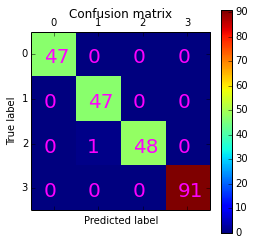

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

for i, cas in enumerate(cm):
    for j, c in enumerate(cas):
        plt.text(j-.2, i+.2, c, fontsize=20, color='magenta')
            
plt.show()